# Bay Wheels Bike Sharing System Usage Pattern 2019

## Investigation Overview
Bay Wheels is a regional public bike sharing system in San Francisco, California. It is the one of the large-scale bicycle sharing system deployed in California since the launch in 2017 and had about 10,000 annual subscribers as of January 2018. This exploration and visualization study mainly focuses on finding the bike usage pattern and knowing more about the customers for a 12-month ride trips data in 2019.

## Dataset Overview

The dataset used for this analysis consists of monthly individual trip data from January 2019 to December 2019 in CSV format covering the greater San Francisco Bay area. Visualizations below are created from wrangled and cleaned data to facilitate exploration analysis and help discover usage pattern and rider characteristics.


In [34]:
import datetime
import calendar
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pandas.api.types import CategoricalDtype


%matplotlib inline
import seaborn as sns


In [35]:
# loading the dataset into a pandas dataframe and cleaning up columns dtypes
df_cleaned = pd.read_csv("bikes_master_ordered.csv")

df_cleaned["start_time"] = pd.to_datetime(df_cleaned['start_time'])
df_cleaned["end_time"] = pd.to_datetime(df_cleaned['end_time'])

df_cleaned['user_type'] = df_cleaned['user_type'].astype('category')
df_cleaned['bike_share_for_all_trip'] = df_cleaned['bike_share_for_all_trip'].astype('category')

df_cleaned['bike_id'] = df_cleaned['bike_id'].astype('str')
df_cleaned['start_station_id'] = df_cleaned['start_station_id'] .astype('str')
df_cleaned['end_station_id'] = df_cleaned['end_station_id'] .astype('str')


df_cleaned['weekday'] = df_cleaned['start_time'].dt.strftime('%a')

weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df_cleaned['weekday'] = df_cleaned['weekday'].astype(ordered_weekdays)


In [36]:
df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207595 entries, 0 to 2207594
Data columns (total 18 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration                 2207595 non-null  int64  
 1   start_time               2207595 non-null  object 
 2   end_time                 2207595 non-null  object 
 3   start_station_id         2207595 non-null  float64
 4   start_station_name       2207595 non-null  object 
 5   start_station_latitude   2207595 non-null  float64
 6   start_station_longitude  2207595 non-null  float64
 7   end_station_id           2207595 non-null  float64
 8   end_station_name         2207595 non-null  object 
 9   end_station_latitude     2207595 non-null  float64
 10  end_station_longitude    2207595 non-null  float64
 11  bike_id                  2207595 non-null  int64  
 12  user_type                2207595 non-null  object 
 13  bike_share_for_all_trip  2207595 non-null 

## User Types and Their Daily Usage

Thursdays and Tuesdays are the most popular days for using bikes, however Wednesday, Mondays and Fridays are very close to Tues & Weds numbers. All of that suggests that Bike usage are more usable on the workdays than weekends. Subscribers user are more than customers but they usually use it more in the weekdays than the weekends.

In [37]:
base_color = sns.color_palette()[0]

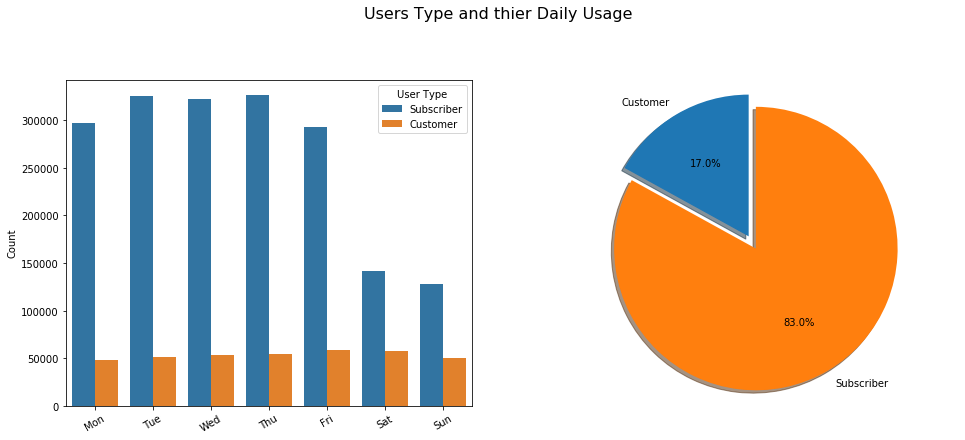

In [38]:
# Visualizing the Daily usage per user type per weekday
plt.figure(figsize=[16, 6]);

# First Plot
plt.subplot(1, 2, 1);

sorted_values = df_cleaned["user_type"].value_counts()/df_cleaned.shape[0];

ax = sns.countplot(data = df_cleaned, x = 'weekday', hue = 'user_type', hue_order = sorted_values.index);
ax.legend(title='User Type');
plt.xticks(rotation=30);
plt.xlabel('');
plt.ylabel('Count');
plt.suptitle('Daily Usage per User Type', fontsize=14, y=1.015);


# Second Plot
plt.subplot(1, 2, 2);

customer = df_cleaned.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_cleaned.query('user_type == "Subscriber"')['bike_id'].count()
customer_prop = customer / df_cleaned['bike_id'].count()
subscriber_prop = subscriber / df_cleaned['bike_id'].count()

labels = ['Customer', 'Subscriber']
size = [customer_prop, subscriber_prop]
explode = (0, 0.1)

plt.pie(size, explode=explode, labels = labels, autopct='%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')

plt.suptitle('Users Type and thier Daily Usage', y = 1.05, fontsize = 16);

# User Types and Their Daily Usage

Spring has the most rides especially in March and April for subscribers users, followed by October that has the third most popular rides. For customers, they used bikes the most in October and September.

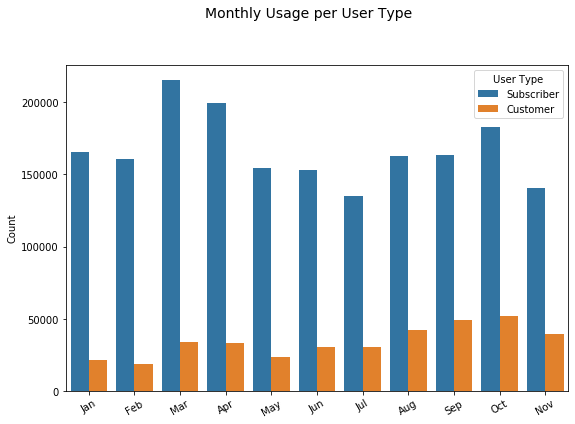

In [55]:
plt.figure(figsize=[9, 6]);


sorted_values = df_cleaned["user_type"].value_counts()/df_cleaned.shape[0];

ax = sns.countplot(data = df_cleaned, x = 'month', hue = 'user_type', hue_order = sorted_values.index);
ax.legend(title = 'User Type');
plt.xticks(rotation = 30);
plt.xlabel('');
plt.ylabel('Count');
plt.suptitle('Monthly Usage per User Type', fontsize=14, y=1.015);


# Trip Duration Distribution  

The average trip is under 12.5 minutes, with 75% of trips being under 14 minutes. By Looking at the histogram, most rides fall in between the 3 - 12 minute range. We can conlcude from that riders are taking the bikes short distances.

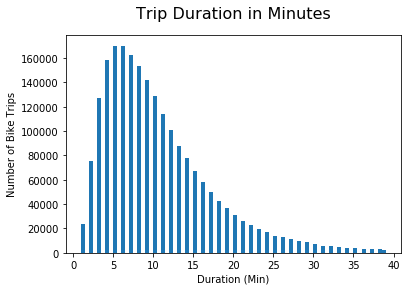

In [40]:
# Duration of the bike rides -in MINUTES
bin_edges = np.arange(1, 39 + 0.5, 0.5)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df_cleaned, x = 'duration', bins = bin_edges);

plt.title("Trip Duration in Minutes", y=1.05, fontsize=16)
plt.xlabel('Duration (Min)')
plt.ylabel('Number of Bike Trips');

# Duration by user type

The boxplot shows the type of personality that our users have. Subscribers user are more of commuters that uses their bikes for daily work that's why they take less time. On the other hand, customers seem to be more of using it for having more fun.

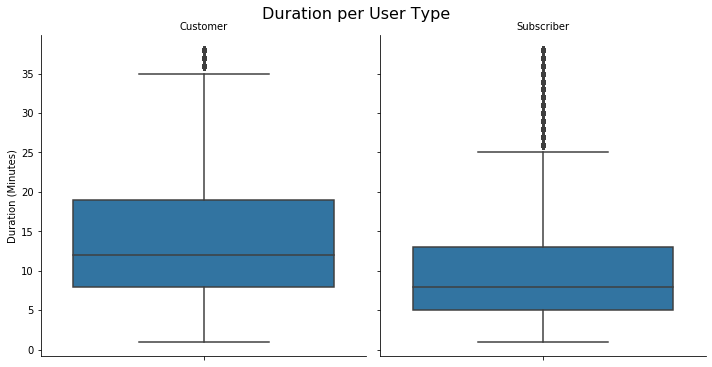

In [53]:
# Checking the duration per user type
data = df_cleaned.query('duration < 39')

ax = sns.catplot(y = 'duration', col = "user_type", data = data, kind='box', color = base_color)

ax.set_titles(col_template = '{col_name}')
ax.set_axis_labels("", "Duration (Minutes)")
ax.fig.suptitle('Duration per User Type', y = 1.01, fontsize = 16);

# Number of Bike Trips for every user type per hour

Customers' favorite hour of riding is 17 and 18 followed by 8. On the other hand, subscribers' favorite hour is 17 and 8 followed by 9. Addtionally, customers seems to be actively using bikesin the afternoon than subscribers do.

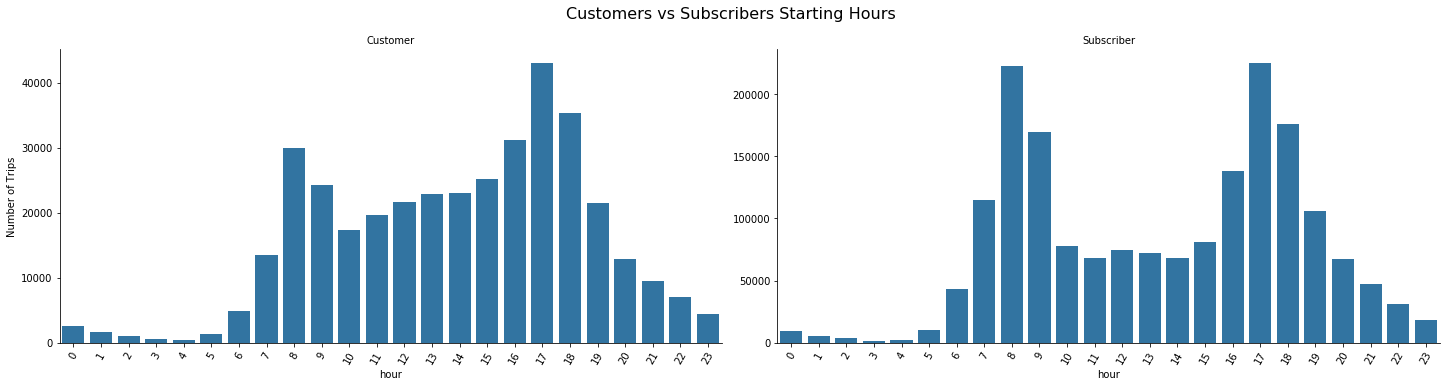

In [51]:
ax = sns.catplot(x = 'hour', col = 'user_type', data = df_cleaned, kind = 'count',
                 sharey = False, color = base_color, aspect = 2);

ax.set_axis_labels('hour', 'Number of Trips')
ax.set_titles('{col_name}')

ax.fig.suptitle('Customers vs Subscribers Starting Hours', y=1.05, fontsize=16);
ax.set_xticklabels(rotation = 60);

# The Average Trip Duration in Minutes per User Type

This plot suggests that subscribers riders use bikes for a shorter period customers. For both users, the average duration is much higher during the weekends. Subscribers users usage of bikes are more efficient than customers. Customers might be using it for fun.

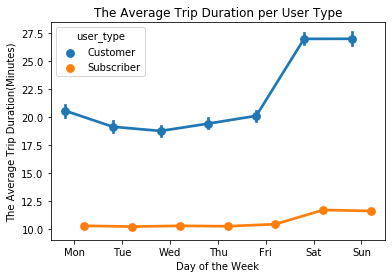

In [47]:
sns.pointplot(x = 'weekday', y = 'duration', data = df_cleaned, hue='user_type', dodge = 0.4)
plt.title('The Average Trip Duration per User Type')
plt.xlabel('Day of the Week')
plt.ylabel('The Average Trip Duration(Minutes)');

# Hourly Usage per Weekdays for Customers and Subscribers

The heatmaps show that subscribers use the system a lot on working days, Monday to Friday whereas customers ride a lot on weekends, especially in the afternoon between 11:00 AM to 16:00 PM. But on the working days they also use it in the morning customoers. Many trips are between 8:00 to 10:00 AM and 16:00 to 18:00 PM on working days. Therefore, we can conlude that custommers prefer weekend afternoons more than subscribers, however, subscribers uses more bikes in the weekdays in the morning and afternnoon, the reason might be for working or school. 

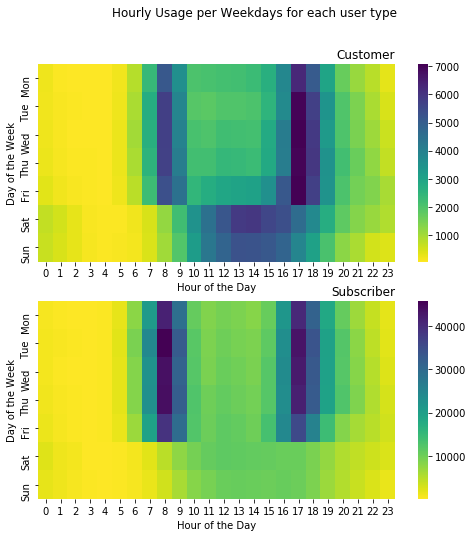

In [48]:
plt.subplots(figsize=(8,8))
plt.suptitle('Hourly Usage per Weekdays for each user type')

plt.subplot(2, 1, 1)
customers = df_cleaned.query('user_type == "Customer"')
cust_counts = customers.groupby(['weekday', 'hour']).size()
cust_counts = cust_counts.reset_index(name = 'count')
cust_counts = cust_counts.pivot(index = 'weekday', columns = 'hour', values = 'count')
sns.heatmap(cust_counts, cmap = 'viridis_r');
plt.title('Customer', loc = 'right');
plt.xlabel('Hour of the Day');
plt.ylabel('Day of the Week');

plt.subplot(2, 1, 2)
subscribers = df_cleaned.query('user_type == "Subscriber"')
sub_counts = subscribers.groupby(['weekday', 'hour']).size()
sub_counts = sub_counts.reset_index(name = 'count')
sub_counts = sub_counts.pivot(index = 'weekday', columns = 'hour', values='count')
sns.heatmap(sub_counts, cmap='viridis_r');
plt.title('Subscriber', loc = 'right');
plt.xlabel('Hour of the Day');
plt.ylabel('Day of the Week');

## Summary

Subscribers are using the bike sharing system more than casual customers. Subscribers hd the most rides during the spring season and the least during the winter months. On the other hand, customers got the most in late summer and in Autumn, also as subscribers they got the least in winter. Obviously the usage of both types are differet and they have  different patterns and riding habits. Subscribers used the system heavily on work days  around 7-9AM and 16-18PM for work commute or study, whereas customers ride a lot over weekends and in the afternoon for leisure/touring purposes. Subscribers tended to have much shorter/quicker trips compared to customers which makes subscriber usage more efficient.